In [55]:
import numpy as np
import pickle as pkl
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,\
confusion_matrix,\
precision_score,\
recall_score,\
ConfusionMatrixDisplay,\
classification_report
import torch
import torch.nn as nn


#### Part A\
\
Load the /public/bmort/python/beans.csv data set into a data frame. Are
there any missing values? Perform any necessary data imputation on the data set.

In [70]:
# 3.a

df = pd.read_table("/public/bmort/python/beans.csv", sep = ",")

nan_count = df.isna().sum()
print(nan_count)

df.replace("NA", pd.NA, inplace=True)
df.fillna(0, inplace = True)
nan_count = df.isna().sum()


Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       1
ShapeFactor4       0
Class              0
dtype: int64



ShapeFactor3 is missing a value. I replaced the "NA" value with 0.



#### Part B\
\
Produce a table of summary statistics on the data set. How do the ranges of the
values in the columns compare? Does each column of data have similar magnitudes
and ranges? Are there any outliers?

In [57]:
# 3.b

df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000,13533.000000
mean,53057.388384,855.066479,319.922981,202.378468,1.581111,0.750310,53777.120890,253.052530,0.749827,0.987150,0.873653,0.800347,0.006561,0.001719,0.644289,0.995077
std,29401.235132,214.781993,85.833897,45.064896,0.245328,0.091890,29853.152141,59.324886,0.048939,0.004651,0.059410,0.061485,0.001130,0.000596,0.098842,0.004348
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.000000,0.947687
25%,36269.000000,703.180000,253.059398,175.884179,1.430641,0.715134,36669.000000,214.893288,0.718753,0.985675,0.833360,0.763181,0.005890,0.001158,0.582424,0.993717
50%,44581.000000,793.897000,296.441382,192.500481,1.549898,0.764011,45123.000000,238.248383,0.759903,0.988287,0.883447,0.801505,0.006643,0.001700,0.642410,0.996393
75%,61422.000000,977.266000,376.352986,217.263451,1.704026,0.809699,62388.000000,279.651425,0.786847,0.990018,0.917039,0.834520,0.007271,0.002173,0.696423,0.997891
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733



There are a wide range of summary statistics in this data set. The means range from the tens of thousands to thousandths. There is a very large variation of means across the data set. I think that the largest outlier is the ConvexArea column. It has the largest mean out of all the means in the data set.



#### Part C\
\
Using the Python seaborn library’s heatmap() function, generate a plot showing
the correlations between the numerical data in the data set. Show the commands
used to generate the plot and include the plot in your output

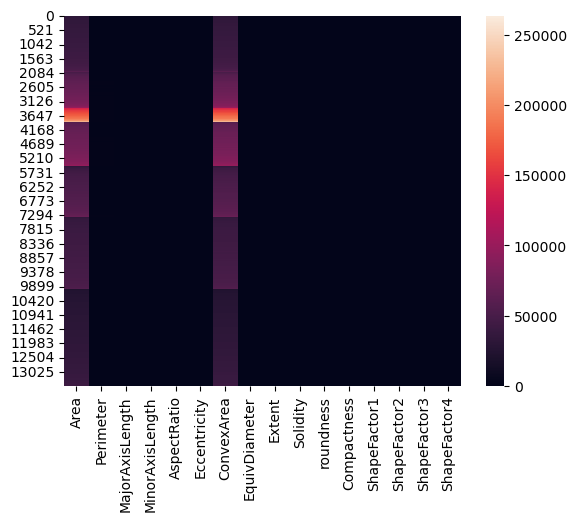

In [58]:
# 3.c

df_2 = df.drop(['Class'], axis=1)
hm = sn.heatmap(data = df_2)
plt.show()


#### Part D\
\
Based on the correlation plot, decide which features to include for machine learning.
Decide if any of these features need to be standardized or scaled appropriately.

In [59]:
# 3.d

normal = df.copy()

for i in normal.columns:
    if(i == 'Class'):
        continue
    if normal[i].dtype != float:
        normal[i] = normal[i].astype(float)
    
    if normal[i].min() > 1 and i != 'Class':
        normal[i] = preprocessing.scale(normal[i])
        normal[i] = abs(normal[i])


Based on the heatmap representation of the data Area and ConvexArea are very large outliers. I am deciding to scale all data columns with mininmum values greater than 1. I will scale these numbers down to reduce the effect of outliers.



#### Part E\
\
Partition the beans data set so that a random sample of 80% of the data will be used
for training and 20% will be used for testing your machine learning model.

In [60]:
# 3.e

X = df.drop('Class', axis = 1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


#### Part F\
\
Using the scikit-learn library, generate a random forest machine learning model for
classifying the 7 types of beans based on the chosen features from the data set. Use
50 trees to build the model. 

In [65]:
# 3.f

rf = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_model = rf.fit(X_train, y_train)


#### Part G\
\
Use the test data set (i.e. the 20% of the data that was kept aside earlier) to
generate a final validation for your model. Generate a multi-class confusion matrix
for the test data to demonstrate the accuracy of the model. Comment on the
accuracy of the model. 

Accuracy: 0.9190986331732546
Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.94      0.89      0.91       262
      BOMBAY       1.00      1.00      1.00       112
        CALI       0.93      0.93      0.93       327
    DERMASON       0.89      0.93      0.91       680
       HOROZ       0.95      0.94      0.94       385
       SEKER       0.94      0.95      0.95       414
        SIRA       0.88      0.85      0.87       527

    accuracy                           0.92      2707
   macro avg       0.93      0.93      0.93      2707
weighted avg       0.92      0.92      0.92      2707



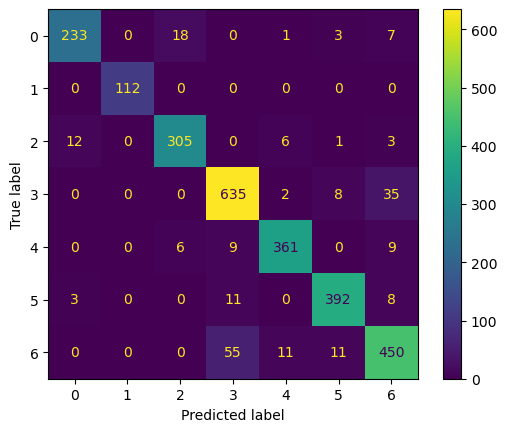

In [66]:
#  3.g

y_predict = rf.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
classification_report_str = classification_report(y_test, y_predict)
ConfusionMatrixDisplay(confusion_matrix = cm).plot()
classification_report_str = classification_report(y_test, y_predict)


print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)



The accuracy of the model is about 92%. I find this accuracy to be very good for the model. The precision between all the beans are pretty decent as well. Sira beans have the least precision while Bombay beans has the most precision. When looking at the support column it can be seen that Sira beans were the second most frequent categoriy in the data set while Bombay beans were the least frequent. This may explain the discrepency between these to classes.



#### Part H\
\
Based on your model, classify the beans provided in the unlabeled
/public/bmort/python/beans-unknown.csv data set. Indicate which
5 classification of the 7 available types has been assigned to each of the 5 unlabeled beans

In [67]:
# 3.h
unknown = pd.read_table("/public/bmort/python/beans-unknown.csv", sep =",")

In [68]:
# preprocessing

for i in unknown.columns:
    if unknown[i].dtype != float:
        unknown[i] = unknown[i].astype(float)
    
    if unknown[i].min() > 1:
        unknown[i] = preprocessing.scale(unknown[i])
        unknown[i] = abs(unknown[i])
      
prediction = rf.predict(unknown)
print(prediction)


['DERMASON' 'DERMASON' 'DERMASON' 'DERMASON' 'DERMASON']



After running the unclassified beans though the prediction model, the model stated that each unclassified bean is a Dermason bean.
